# Milestone 2 
---

**This is me writing in bold**

*I can do italics too*

This file includes
- Task 4: EDA
- Task 5: Analysis

## Task 4: Exploratory Data Analysis on Soviet Union/Russia
---

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns

from project_functions import loaddata
from project_functions import nocMedals
from project_functions import nocathletes
from project_functions import athletesMedals
from project_functions import medalsYear
from project_functions import athletesYear
from project_functions import nocMedalsYear
from project_functions import nocAthletesYear
from project_functions import getnoc

data = pd.read_csv('../../data/raw/olympic_dataset.csv', low_memory=False, encoding = 'utf-8')
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [57]:
#RUS=Russia, URS=Soviet Union, EUN=Former Soviet Union
rus=(data['NOC'] == 'RUS')|(data['NOC'] == 'URS')|(data['NOC'] == 'EUN')
athletes=data[(rus)]
athletes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
163,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
164,67,Mariya Vasilyevna Abakumova (-Tarabina),F,26.0,179.0,80.0,Russia,RUS,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Javelin Throw,NaN
192,87,Rost'om Omeris dze Abashidze,M,29.0,188.0,97.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN
193,88,Nunu Dzhansuhivna Abashydze (-Myslaieva),F,25.0,168.0,105.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's Shot Put,NaN
195,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver
271104,135564,Yevgeny Aleksandrovich Zykov,M,22.0,172.0,65.0,Russia-1,RUS,2002 Winter,2002,Winter,Salt Lake City,Luge,Luge Mixed (Men)'s Doubles,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN


This shows all of the athletes that were part of the Soviet Union and Russia

In [28]:
print("Statistics relating to Russia at the olympics from 1896 to 2016:")
print("Count of events particpated in by Russian athletes: "+str(athletes.shape[0]))
athletesUnique=data[rus].drop_duplicates(subset=['Name'])
print("Count of Russia athletes who have competed at the olympics: "+str(athletesUnique.shape[0]))
medals=athletes.dropna(subset=["Medal"])
print("Count medals won by russian athletes: "+str(medals.shape[0]))
avgAge=athletesUnique['Age'].mean()
print("Average age of russian athletes who have competed: "+str(avgAge))

Statistics relating to Russia at the olympics from 1896 to 2016:
Count of events particpated in by Russian athletes: 11692
Count of Russia athletes who have competed at the olympics: 5597
Count medals won by russian athletes: 3947
Average age of russian athletes who have competed: 24.086206896551722


Text(0.5, 1.0, 'Total Medals won by Russian olympic athletes each year')

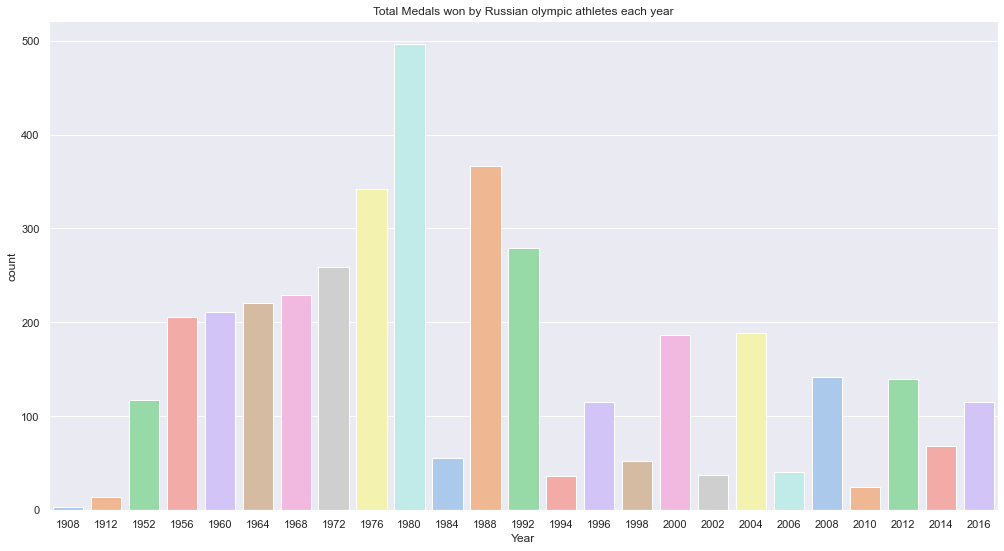

In [44]:
sns.set(rc={'figure.figsize':(17,9)})
totalmedalsPerYear=(sns.countplot(data=medals, x="Year", palette="pastel"))
totalmedalsPerYear.set_title("Total Medals won by Russian olympic athletes each year")

Text(0.5, 1.0, 'Number of Gold, Silver, and Bronze medals won by Russian olympic athletes each year')

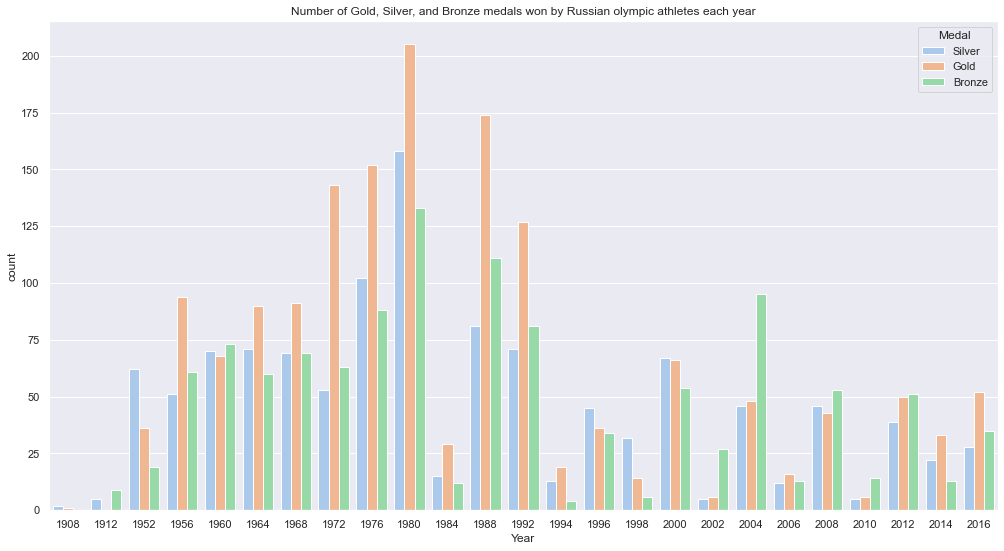

In [43]:
sns.set(rc={'figure.figsize':(17,9)})
medalsPerYear=(sns.countplot(data=medals, x="Year", hue="Medal", palette="pastel"))
medalsPerYear.set_title("Number of Gold, Silver, and Bronze medals won by Russian olympic athletes each year")

The chart above shows the amount of gold, silver and bronze medals won total in each year for Russia/Soviet Union

    Observations:
- The most total medals were won in 1980
- The most Gold medals were won in the year 1980
- The most Silver medals were won in the year 1980 as well, as well as the most bronze medals
    - It can be seen that clearly the most amount of medals total won was in 1980 which explains why this year has the most gold, silver and bronze medals won
- 1908 had the least amount of medals won 

Text(0.5, 1.0, 'Total Number of Russian olympic athletes each year')

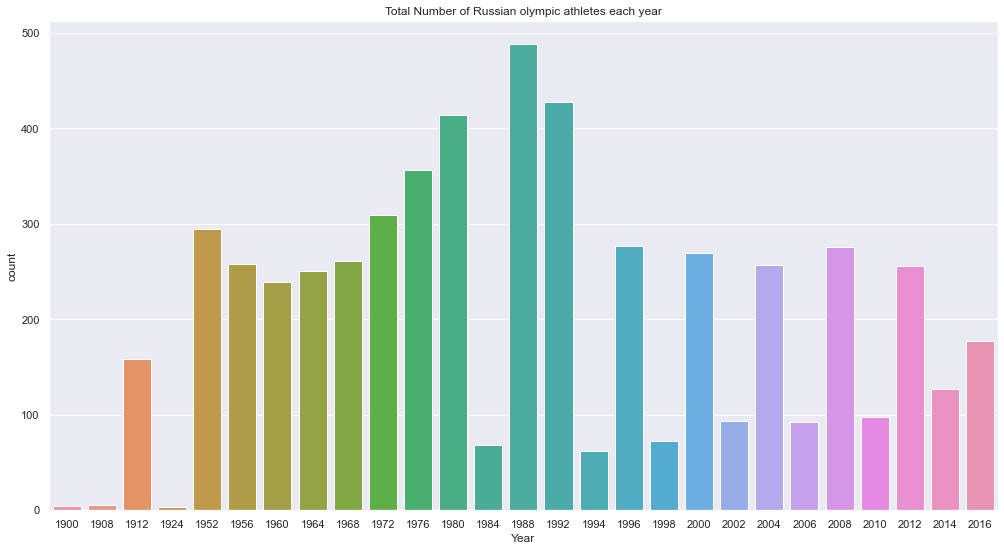

In [46]:
athletesPerYear=(sns.countplot(data=athletesUnique, x="Year"))
athletesPerYear.set_title("Total Number of Russian olympic athletes each year")

The above chart shows the number of Russian athletes that competed in the olympics each year

    Obervations:
- The year 1988 had the most athletes participating in the olympics
- The year 1924 had the least athletes participating in the olympics, with 1900 and 1908 very close to the least amount as well

Text(0.5, 1.0, 'Number of Male and Female Russian olympic athletes each year')

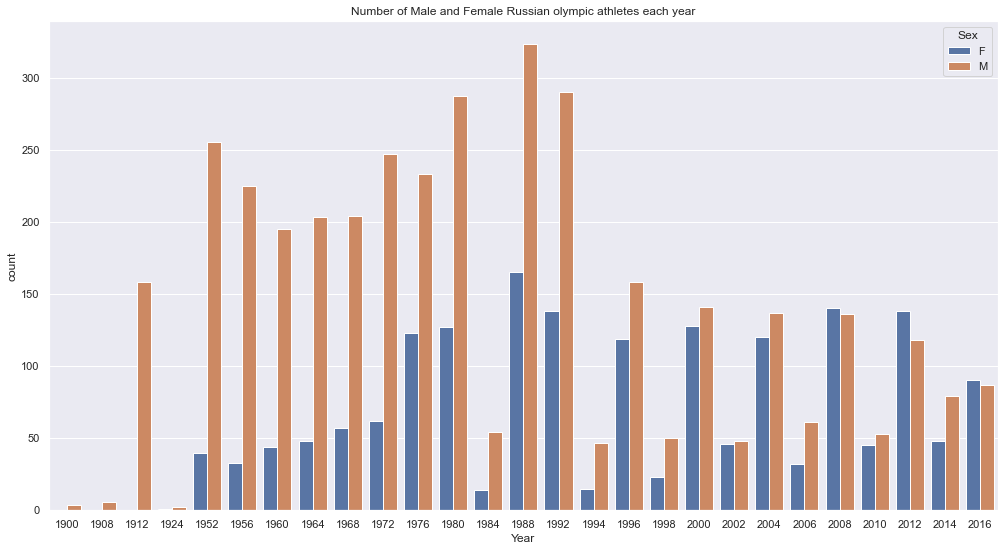

In [47]:
athletesPerYear2=(sns.countplot(data=athletesUnique, x="Year", hue="Sex"))
athletesPerYear2.set_title("Number of Male and Female Russian olympic athletes each year")

The above chart shows the number of athletes from Russia/Soviet Union separated by male and female that competed each year

    Observations:
- The year with the most male athletes is 1988
- The year with the most female athletes is also 1988

Text(0.5, 1.0, 'Average age of Russian olympic athletes per year')

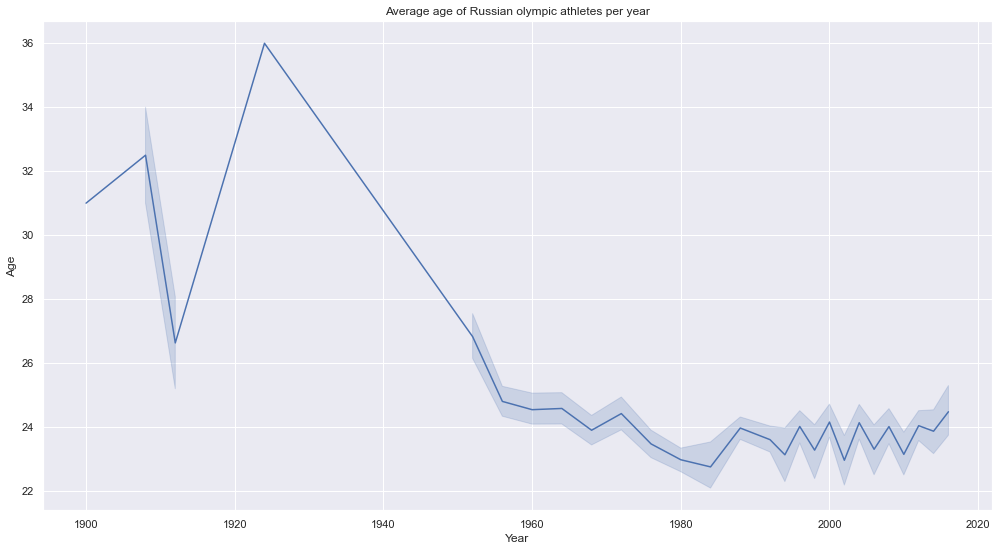

In [59]:
agePerYear=(sns.lineplot(data=athletesUnique, x="Year", y='Age'))
agePerYear.set_title("Average age of Russian olympic athletes per year")

The above chart shows the average age of Russian olympic athletes throughout the years

## Task 5: Analysis
---

In [9]:
maleAthletes=data[rus&(data['Sex'] == 'M')]
print("Count of events participated by Russian male athletes: "+str(maleAthletes.shape[0]))

Count of events participated by Russian male athletes: 7587


In [10]:
femaleAthletes=data[rus&(data['Sex'] == 'F')]
print("Count of events participated by Russian female athletes: "+str(femaleAthletes.shape[0]))

Count of events participated by Russian female athletes: 4105


In [11]:
maleAthletesUnique=maleAthletes.drop_duplicates(subset=['Name'])
print("Count of male Russian athletes who have competed in the olympics: "+str(maleAthletesUnique.shape[0]))

Count of male Russian athletes who have competed in the olympics: 3801


In [12]:
femaleAthletesUnique=femaleAthletes.drop_duplicates(subset=['Name'])
print("Count of female Russian athletes who have competed in the olympics: "+str(femaleAthletesUnique.shape[0]))

Count of female Russian athletes who have competed in the olympics: 1796


In [13]:
maleAthletesMedals=maleAthletes.dropna()
print("Number of medals won by male Russian athletes: "+str(maleAthletesMedals.shape[0]))

Number of medals won by male Russian athletes: 2340


In [14]:
femaleAthletesMedals=femaleAthletes.dropna()
print("Number of medals won by female Russian athletes: "+str(femaleAthletesMedals.shape[0]))

Number of medals won by female Russian athletes: 1270


In [60]:
maleAthletesMedalsUnique=maleAthletesMedals.drop_duplicates(subset=['Name'])
print("Count of individual male Russian athletes who won medals: "+str(maleAthletesMedalsUnique.shape[0]))

Count of individual male Russian athletes who won medals: 1550


In [62]:
femaleAthletesMedalsUnique=femaleAthletesMedals.drop_duplicates(subset=['Name'])
print("Count of individual female Russian athletes who won medals: "+str(femaleAthletesMedalsUnique.shape[0]))

Count of individual female Russian athletes who won medals: 798


In [64]:
top5=data[rus].value_counts(['Sport']).dropna
top5

<bound method Series.dropna of Sport                    
Athletics                    1573
Gymnastics                   1289
Swimming                      919
Cross Country Skiing          542
Fencing                       529
Speed Skating                 460
Rowing                        454
Shooting                      417
Ice Hockey                    405
Cycling                       346
Volleyball                    303
Wrestling                     300
Biathlon                      283
Canoeing                      278
Basketball                    264
Alpine Skiing                 241
Handball                      224
Figure Skating                217
Water Polo                    215
Equestrianism                 212
Sailing                       205
Diving                        185
Boxing                        172
Ski Jumping                   135
Weightlifting                 126
Bobsleigh                     120
Luge                          118
Football                 